In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from sklearn.ensemble import RandomForestClassifier
import os

In [66]:
# Create a connection to the SQLite database
engine = create_engine('sqlite:///data/churn_data.db')
# Query the ‘churn’ table
data_from_db = pd.read_sql('SELECT * FROM churn', engine)
# Display the first few rows of the queried data
(data_from_db.head())

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,-1.277354,-1.160241,-0.994171,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0.066323,-0.259611,-0.173232,No,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,-1.236636,-0.362635,-0.959606,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,0.514215,-0.746482,-0.194752,No,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,-1.236636,0.197351,-0.940403,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [77]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values
data_from_db.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_from_db.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_from_db[column] = label_encoders[column].fit_transform(data_from_db[column])

# Display the first few rows after preprocessing
data_from_db.head()


/var/folders/zs/lvsv_8w134ndsb5fcvv4fr440000gn/T/ipykernel_94207/2190014093.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_from_db.fillna(method='ffill', inplace=True)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,5375,0,-1.277354,-1.160241,-0.994171,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3962,0,0.066323,-0.259611,-0.173232,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,2564,0,-1.236636,-0.362635,-0.959606,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,5535,0,0.514215,-0.746482,-0.194752,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6511,0,-1.236636,0.197351,-0.940403,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [96]:
data_from_db.corr()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,1.000000,-0.002074,0.008035,-0.003916,-0.000019,-0.017447,0.006288,-0.026729,-0.012823,-0.006483,...,-0.006094,-0.004493,-0.006094,-0.012632,0.000731,0.014306,-0.001945,0.013082,-0.002509,0.007441
SeniorCitizen,-0.002074,1.000000,0.016567,0.220173,0.102652,0.150889,-0.001874,0.016479,-0.211185,0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.008035,0.016567,1.000000,0.247900,0.825464,-0.352229,0.005106,0.379697,0.159712,0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,-0.003916,0.220173,0.247900,1.000000,0.650864,0.193356,-0.014569,0.096848,-0.113890,0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,-0.000019,0.102652,0.825464,0.650864,1.000000,-0.199037,-0.000002,0.318364,0.063593,0.113013,...,-0.374706,0.515279,-0.374706,0.519884,0.170649,0.356226,0.158055,0.182745,-0.059971,-0.294814
Churn,-0.017447,0.150889,-0.352229,0.193356,-0.199037,1.000000,-0.008612,-0.150448,-0.164221,0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,0.006288,-0.001874,0.005106,-0.014569,-0.000002,-0.008612,1.000000,-0.001808,0.010517,-0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,-0.026729,0.016479,0.379697,0.096848,0.318364,-0.150448,-0.001808,1.000000,0.452676,0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.012823,-0.211185,0.159712,-0.113890,0.063593,-0.164221,0.010517,0.452676,1.000000,-0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,-0.006483,0.008576,0.008448,0.247398,0.113013,0.011942,-0.006488,0.017706,-0.001762,1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319


In [125]:
#split data into testing and training bins
from sklearn.model_selection import train_test_split

# Define features and target
target_col = 'Churn'  # Change to your target column name
X = data_from_db.drop(columns=[target_col, "gender_Male", "customerID", "OnlineSecurity_No internet service", "PhoneService_Yes", "MultipleLines_No phone service", "OnlineBackup_No internet service", "StreamingMovies_No internet service", "DeviceProtection_No internet service"
                        ])
y = data_from_db[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred


In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   PhoneService_Yes                       7043 non-null   int64  
 4   MultipleLines_No phone service         7043 non-null   int64  
 5   MultipleLines_Yes                      7043 non-null   int64  
 6   InternetService_Fiber optic            7043 non-null   int64  
 7   InternetService_No                     7043 non-null   int64  
 8   OnlineSecurity_No internet service     7043 non-null   int64  
 9   OnlineSecurity_Yes                     7043 non-null   int64  
 10  OnlineBackup_No internet service       7043 non-null   int64  
 11  Onli

In [126]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [138]:
#Random forest classifier 

rf=RandomForestClassifier()
model=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# fit to randomized rf
model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   8.4s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   5.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   7.4s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   3.4s
[CV] END criterion=entropy

In [139]:
# Initialize the model
model_type = 'classification'

if model_type == 'classification':
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
from sklearn.metrics import accuracy_score, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
if model_type == 'classification':
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    if accuracy >= 0.75:
        print("Model accuracy >= 75%")
    else:
        print("Model accuracy < 75%")

else:
    r_squared = r2_score(y_test, y_pred)
    print(f"R-squared: {r_squared}")
    if r_squared >= 0.80:
        print("Model has R-squared >= 0.80")
    else:
        print("Model has R-squared < 0.80")

Accuracy: 0.8026969481902059
Model accuracy >= 75%


In [141]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [142]:
#Array feature importances
model.feature_importances_

array([0.02087042, 0.17529149, 0.18451634, 0.21094687, 0.02482594,
       0.02076826, 0.02116741, 0.03783083, 0.01112038, 0.02563477,
       0.02322927, 0.02012163, 0.01013862, 0.02354438, 0.00733128,
       0.01838382, 0.01904331, 0.02188446, 0.02957666, 0.02725009,
       0.01318045, 0.03980622, 0.01353709])

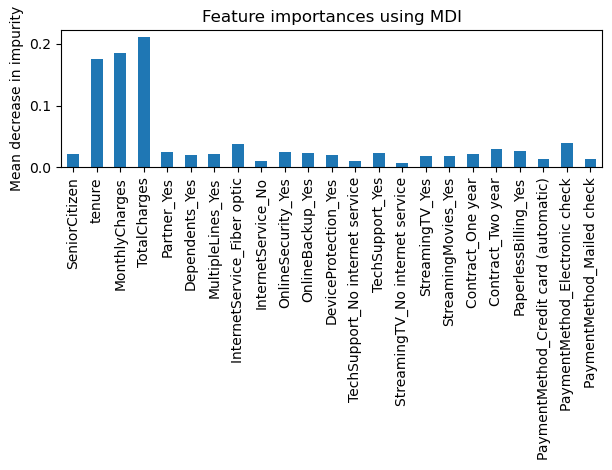

In [143]:
#Aanking feature importance

forest_importances = pd.Series(model.feature_importances_, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [144]:
forest_importances.sort_values()


StreamingTV_No internet service          0.007331
TechSupport_No internet service          0.010139
InternetService_No                       0.011120
PaymentMethod_Credit card (automatic)    0.013180
PaymentMethod_Mailed check               0.013537
StreamingTV_Yes                          0.018384
StreamingMovies_Yes                      0.019043
DeviceProtection_Yes                     0.020122
Dependents_Yes                           0.020768
SeniorCitizen                            0.020870
MultipleLines_Yes                        0.021167
Contract_One year                        0.021884
OnlineBackup_Yes                         0.023229
TechSupport_Yes                          0.023544
Partner_Yes                              0.024826
OnlineSecurity_Yes                       0.025635
PaperlessBilling_Yes                     0.027250
Contract_Two year                        0.029577
InternetService_Fiber optic              0.037831
PaymentMethod_Electronic check           0.039806


In [145]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
if r_squared >= 0.80:
    print("Model has R-squared >= 0.80")
else:
    print("Model has R-squared < 0.80")

R-squared: -0.013648079331725294
Model has R-squared < 0.80


In [146]:
y_test, y_pred

(185     1
 2715    0
 3825    0
 1807    1
 132     0
        ..
 6366    0
 315     0
 2439    0
 5002    0
 1161    1
 Name: Churn, Length: 1409, dtype: int64,
 array([1, 0, 0, ..., 0, 0, 0]))

In [147]:
accuracy_percent = accuracy * 100
accuracy_percent

80.26969481902059